In [1]:
import re
from pathlib import Path
from pprint import pp

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    PredictionErrorDisplay,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from P05_run_center_loc_7.T00_lib.classes import MyUtil
from P05_run_center_loc_7.T00_lib.utils import check_jupyter


In [2]:
SAVE_DATA = False
MAKE_ONE_HOT = False

In [3]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent / "T02_combine_features"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P05_run_center_loc_7/T02_combine_features"
    CURRENT_DIR = Path(__file__).resolve().parent

dt = MyUtil.get_dt()
print(f"Current Directory: {CURRENT_DIR}")
print(f"Current Date and Time: {dt}")

# Load data
df = pd.read_excel(DATA_DIR / "S01_data_combined_individual.xlsx")
print(df.shape)
df

Code is running in a Jupyter environment.
Current Directory: c:\Users\admin\Coding\research\weld-ml\src\P05_run_center_loc_7\T03_ml_trial
Current Date and Time: 2026-01-11_22-19
(162, 25)


,sample_no,R,W,D,Center_L7,"dwell_Fz__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","dwell_Fz__fft_coefficient__attr_""real""__coeff_35","dwell_Fz__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","dwell_Fz__fft_coefficient__attr_""real""__coeff_39",...,"weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.2__ql_0.0",weld_Fz__lempel_ziv_complexity__bins_2,"weld_Fz__fft_coefficient__attr_""imag""__coeff_3","weld_Fz__fft_coefficient__attr_""abs""__coeff_0","weld_Fz__fft_coefficient__attr_""real""__coeff_0"
0,1,1400,60,10,6,0.001591,0.058345,0.413874,0.004987,0.079870,...,0.005640,0.000592,0.001825,0.000409,0.000069,0.000628,0.024921,669.139325,23410.069643,23410.069643
1,2,1400,60,15,2,0.003954,0.076371,1.372410,0.009783,1.440357,...,0.008885,0.001515,0.002662,0.000723,0.000476,0.000598,0.044920,656.217530,22352.769318,22352.769318
2,3,1400,60,20,8,0.001694,0.058276,1.199198,0.005089,0.717143,...,0.007856,0.002915,0.002434,0.000582,0.000238,0.000355,0.043458,508.557940,23248.980550,23248.980550
3,4,1400,70,10,3,0.001422,0.062345,0.259421,0.005308,0.180546,...,-0.001150,-0.002131,-0.001110,-0.000489,-0.000674,-0.000813,0.049892,221.654610,20550.524463,20550.524463
4,5,1400,70,15,6,0.001443,0.051703,-5.093506,0.004113,0.623182,...,0.012461,0.005496,0.002638,0.001675,0.001973,0.006244,0.035176,452.512515,15253.195715,15253.195715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,52,1600,80,10,3,0.002037,0.074833,0.734850,0.007621,0.723234,...,0.005970,0.002110,0.001576,0.000469,0.000272,-0.000899,0.045329,631.079306,13212.166846,13212.166846
158,53,1600,80,15,5,0.002863,0.096929,2.130627,0.012228,1.351784,...,0.004806,0.003661,0.002470,-0.000155,-0.000449,0.001444,0.024613,598.172699,14116.837376,14116.837376
159,53,1600,80,15,5,0.002863,0.096929,2.130627,0.012228,1.351784,...,0.004806,0.003661,0.002470,-0.000155,-0.000449,0.001444,0.024613,598.172699,14116.837376,14116.837376
160,54,1600,80,20,2,0.002980,0.099692,1.405228,0.012900,1.704877,...,-0.002719,-0.000250,-0.001394,0.000046,-0.000326,-0.000718,0.025741,926.334548,14256.838414,14256.838414


In [4]:
stress_patterns = [r"AA5052", r"AA6061", r"Center"]
combined_pattern = "|".join(stress_patterns)
colsY = [c for c in df.columns if re.search(combined_pattern, c)]
colsX = [c for c in df.columns if c not in colsY]
print(colsY)
print(colsX)

['Center_L7']
['sample_no', 'R', 'W', 'D', 'dwell_Fz__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.8', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_35', 'dwell_Fz__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.8', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_39', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_69', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_64', 'dwell_Fz__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.6', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_82', 'dwell_Fz__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)', 'weld_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.2', 'weld_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.6__ql_0.2', 'weld_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0', 'weld_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.4', 'weld_Fz__change_quantiles__f_agg_"mean"__isabs_False__

In [5]:
dfY = df[colsY]
dfX_all = df[colsX]

In [6]:
if MAKE_ONE_HOT:
    dft1 = pd.get_dummies(dfX_all, columns=["R", "W", "D"], drop_first=False, dtype=int)
    dfX = dft1.drop(columns=["sample_no"])
else:
    dfX = dfX_all.drop(columns=["sample_no"])
dfX

,R,W,D,"dwell_Fz__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8","dwell_Fz__fft_coefficient__attr_""real""__coeff_35","dwell_Fz__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.8","dwell_Fz__fft_coefficient__attr_""real""__coeff_39","dwell_Fz__fft_coefficient__attr_""real""__coeff_69","dwell_Fz__fft_coefficient__attr_""real""__coeff_64",...,"weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.4","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.0","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.2__ql_0.0",weld_Fz__lempel_ziv_complexity__bins_2,"weld_Fz__fft_coefficient__attr_""imag""__coeff_3","weld_Fz__fft_coefficient__attr_""abs""__coeff_0","weld_Fz__fft_coefficient__attr_""real""__coeff_0"
0,1400,60,10,0.001591,0.058345,0.413874,0.004987,0.079870,0.456444,0.301128,...,0.005640,0.000592,0.001825,0.000409,0.000069,0.000628,0.024921,669.139325,23410.069643,23410.069643
1,1400,60,15,0.003954,0.076371,1.372410,0.009783,1.440357,0.628470,0.296578,...,0.008885,0.001515,0.002662,0.000723,0.000476,0.000598,0.044920,656.217530,22352.769318,22352.769318
2,1400,60,20,0.001694,0.058276,1.199198,0.005089,0.717143,0.082274,0.378001,...,0.007856,0.002915,0.002434,0.000582,0.000238,0.000355,0.043458,508.557940,23248.980550,23248.980550
3,1400,70,10,0.001422,0.062345,0.259421,0.005308,0.180546,0.180509,-0.008381,...,-0.001150,-0.002131,-0.001110,-0.000489,-0.000674,-0.000813,0.049892,221.654610,20550.524463,20550.524463
4,1400,70,15,0.001443,0.051703,-5.093506,0.004113,0.623182,-0.592288,-0.383295,...,0.012461,0.005496,0.002638,0.001675,0.001973,0.006244,0.035176,452.512515,15253.195715,15253.195715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1600,80,10,0.002037,0.074833,0.734850,0.007621,0.723234,0.448410,0.387149,...,0.005970,0.002110,0.001576,0.000469,0.000272,-0.000899,0.045329,631.079306,13212.166846,13212.166846
158,1600,80,15,0.002863,0.096929,2.130627,0.012228,1.351784,1.008187,1.376471,...,0.004806,0.003661,0.002470,-0.000155,-0.000449,0.001444,0.024613,598.172699,14116.837376,14116.837376
159,1600,80,15,0.002863,0.096929,2.130627,0.012228,1.351784,1.008187,1.376471,...,0.004806,0.003661,0.002470,-0.000155,-0.000449,0.001444,0.024613,598.172699,14116.837376,14116.837376
160,1600,80,20,0.002980,0.099692,1.405228,0.012900,1.704877,1.392255,1.527583,...,-0.002719,-0.000250,-0.001394,0.000046,-0.000326,-0.000718,0.025741,926.334548,14256.838414,14256.838414


In [7]:
# Extract features and targets
_X = dfX.values
_Y = dfY.values

print(_X.shape)
print(_Y.shape)

(162, 23)
(162, 1)


In [8]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.2, random_state=1
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(129, 23)
(33, 23)
(129, 1)
(33, 1)


In [9]:
scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

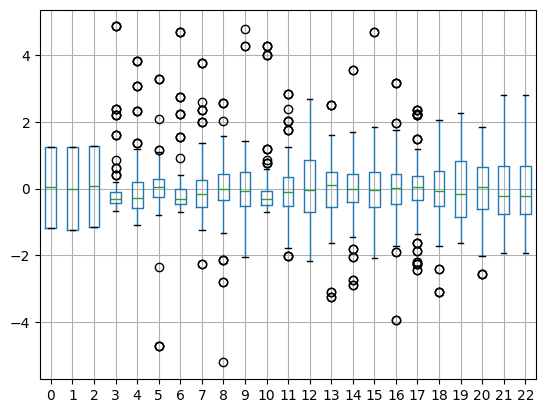

In [10]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

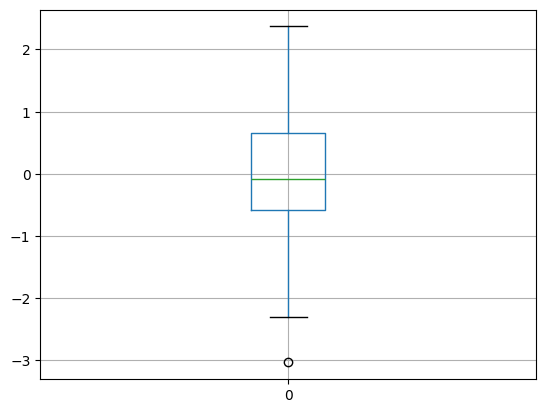

In [11]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, svd_solver="full")
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(129, 3)
(33, 3)


In [13]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# reg = MultiOutputRegressor(estimator=SVR(C=100))
# reg = MultiOutputRegressor(estimator=LinearRegression())
# reg = MultiOutputRegressor(
#     estimator=RandomForestRegressor(n_estimators=200, random_state=0)
# )
# reg = MultiOutputRegressor(
#     estimator=GradientBoostingRegressor(n_estimators=200, random_state=0, max_depth=1)
# )
reg = MultiOutputRegressor(
    estimator=XGBRegressor(n_estimators=2000, random_state=0, max_depth=1, gamma=10)
)

In [14]:
reg.fit(X_train, Y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=10,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=1,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=2000, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [15]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(129, 1)
(33, 1)


In [16]:
def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-1
MSE Train : 0.7400798620475388
MSE Test : 0.6501172137270964
MAPE Train : 1.1020331898824325
MAPE Test : 1.0444399664056192
R2 Train : 0.25992013795246116
R2 Test : 0.2763241823721456


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,0.74008,0.650117,1.102033,1.04444,0.25992,0.276324
1,Y-All,0.74008,0.650117,1.102033,1.04444,0.25992,0.276324


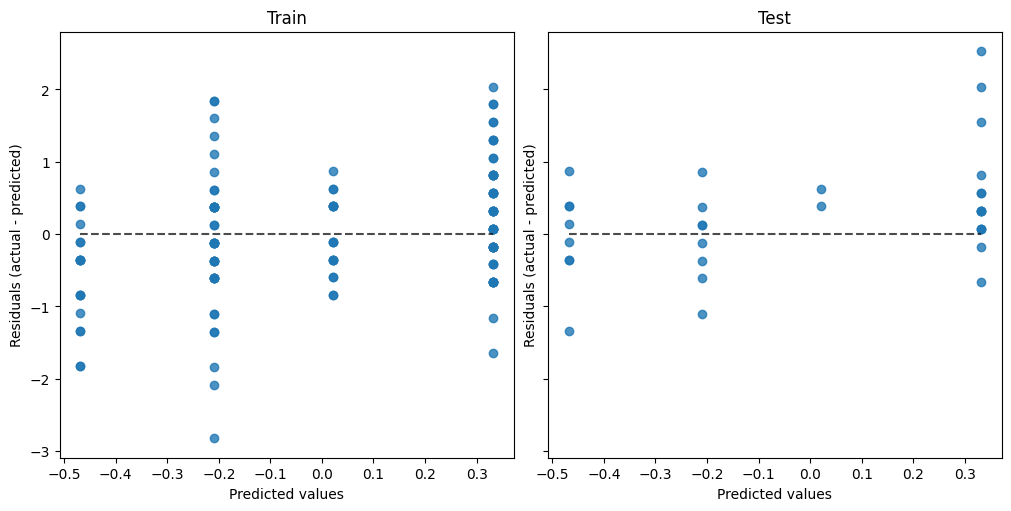

In [17]:
for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()